## Imports and Setup

In [1]:
import os
import pandas as pd
import geopandas as gpd
import logging
import torch

import sys
sys.path.insert(0, "../utils/")
import model_utils
import config_utils
import embed_utils

%load_ext autoreload
%autoreload 2

## Data Configurations

In [34]:
iso_code = "CRB"
cwd = os.path.dirname(os.getcwd())
config_file = os.path.join(cwd, f"configs/model_configs/{iso_code}-dinov2_vits14-LR.yaml")
config = config_utils.load_config(config_file)

## Load Model

In [35]:
model = torch.hub.load("facebookresearch/dinov2", config["embed_model"])
model.name = config["embed_model"]
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model.to(device)

Using cache found in /home/itingzon.unicef/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

## Load Data

In [36]:
data = model_utils.load_data(config, attributes=["rurban", "iso"], verbose=True)
data.head(3)

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/train/CRB_train.geojson
INFO:root:
   rurban  iso       class  count  percentage
0   rural  ATG  non_school     87    0.014753
1   rural  ATG      school     17    0.002883
2   rural  BLZ  non_school    446    0.075632
3   rural  BLZ      school    135    0.022893
4   rural  BRB  non_school    126    0.021367
5   rural  BRB      school     23    0.003900
6   rural  DMA  non_school     76    0.012888
7   rural  DMA      school     45    0.007631
8   rural  GRD  non_school     40    0.006783
9   rural  GRD      school     18    0.003052
10  rural  KNA  non_school     97    0.016449
11  rural  KNA      school     19    0.003222
12  rural  LCA  non_school    116    0.019671
13  rural  LCA      school     29    0.004918
14  rural  TTO  non_school    279    0.047312
15  rural  TTO      school    111    0.018823
16  rural  VCT  non_school     63    0.010683
17  rural  VCT      school     30    0.005087
18  urban  ATG  non_school  

None


,UID,source,iso,country,region,subregion,name,giga_id_school,clean,validated,class,ghsl_smod,rurban,dataset,geometry
0,OVERTURE-TTO-SCHOOL-00000000,OVERTURE,TTO,Trinidad and Tobago,Americas,Latin America and the Caribbean,Roxborough Secondary School,None,0,0.0,school,12,rural,test,POINT (-5999230.537 1388132.458)
1,OVERTURE-TTO-SCHOOL-00000004,OVERTURE,TTO,Trinidad and Tobago,Americas,Latin America and the Caribbean,The Pembroke Anglican School,None,0,0.0,school,22,urban,train,POINT (-6003901.806 1383454.849)
2,OVERTURE-TTO-SCHOOL-00000005,OVERTURE,TTO,Trinidad and Tobago,Americas,Latin America and the Caribbean,Speyside High School,None,0,0.0,school,12,rural,train,POINT (-5994047.394 1392856.183)


## Urban Schools

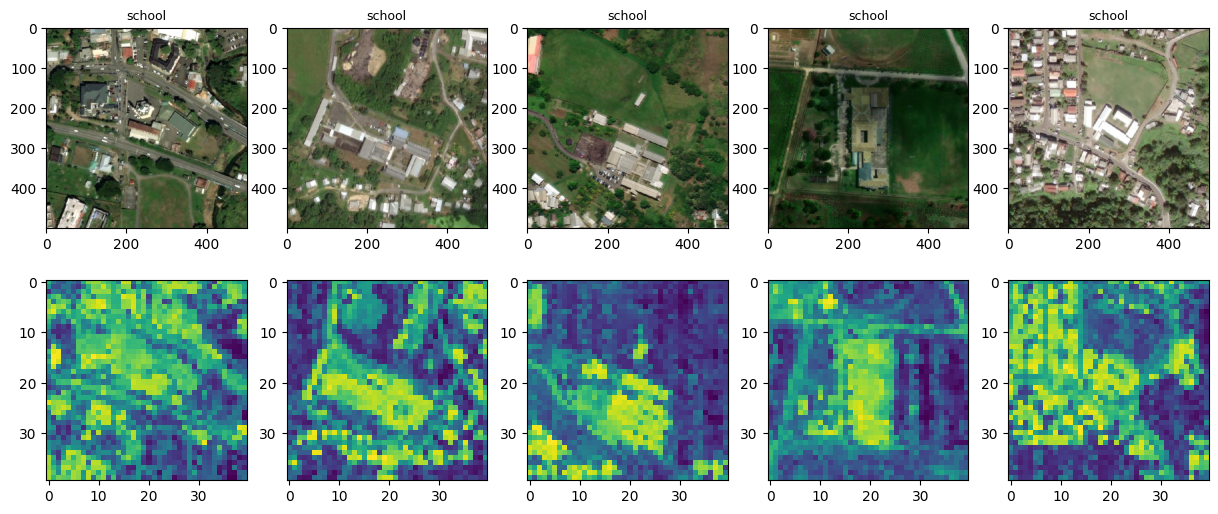

In [41]:
subdata = data[(data.rurban=="urban") & (data["class"] == "school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

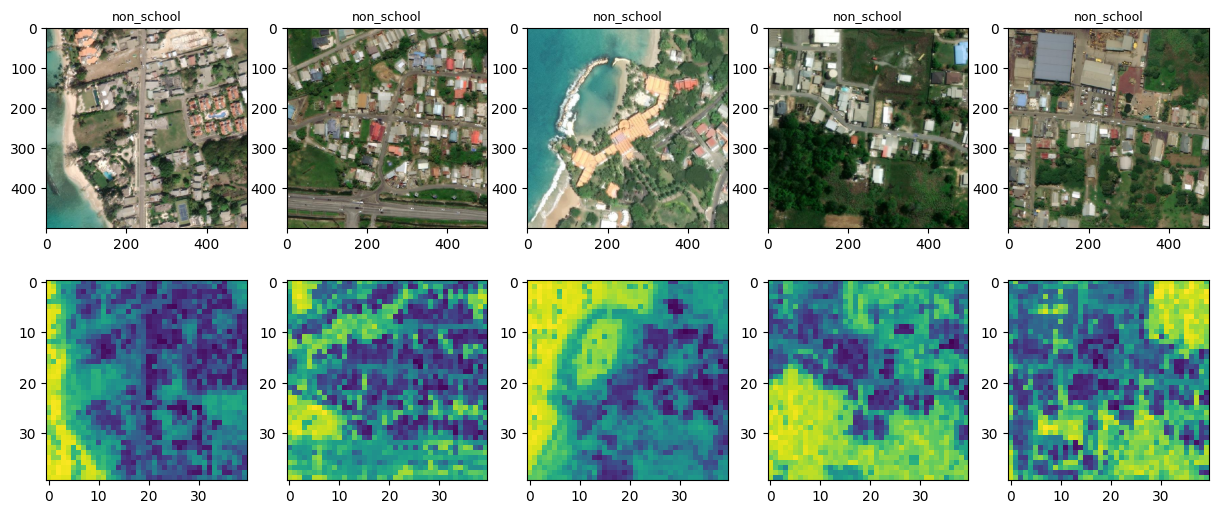

In [38]:
subdata = data[(data.rurban=="urban") & (data["class"] == "non_school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

## Rural Schools

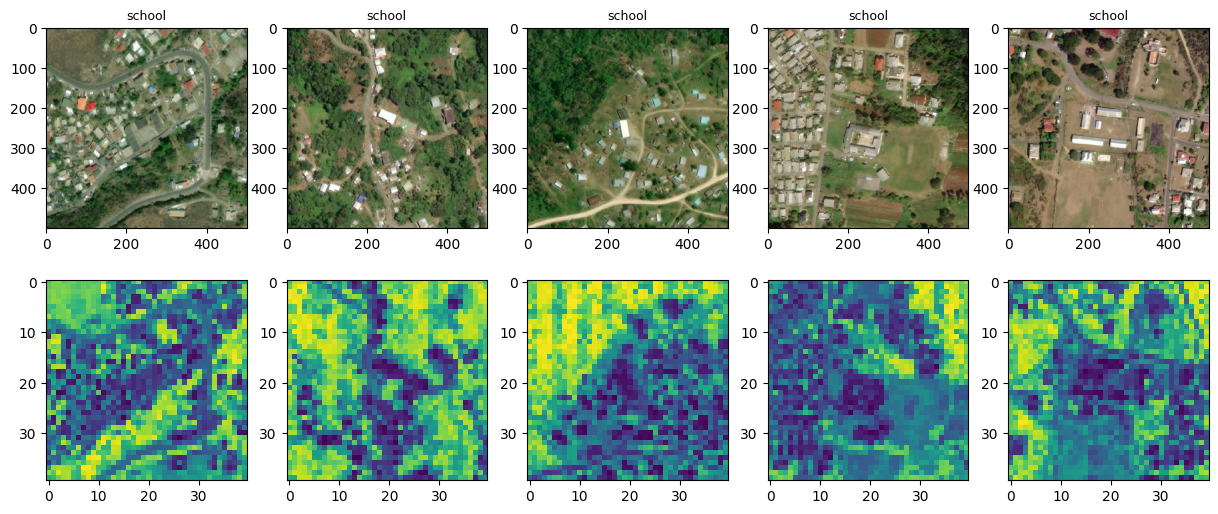

In [39]:
subdata = data[(data.rurban=="rural") & (data["class"] == "school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

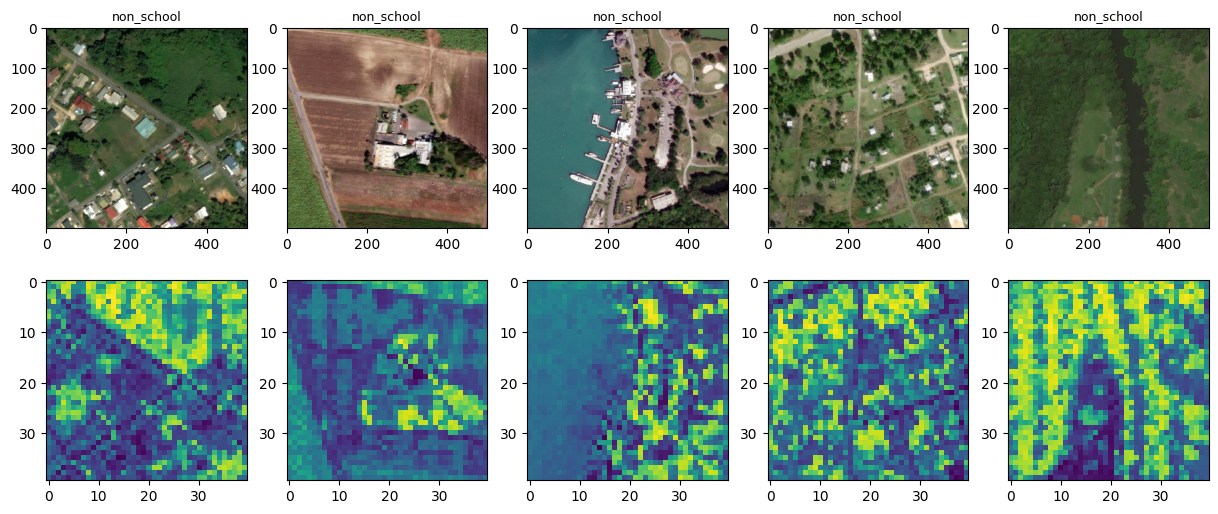

In [40]:
subdata = data[(data.rurban=="rural") & (data["class"] == "non_school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

## Compute Embeddings

In [66]:
embeddings = embed_utils.compute_embeddings(config, data, model)
embeddings.head(3)

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/embeds/BWA_dinov2_vitl14_embeds.csv


,UID,0,1,2,3,4,5,6,7,8,...,1018,1019,1020,1021,1022,1023,iso,rurban,dataset,class
0,OVERTURE-BWA-SCHOOL-00000000,-1.871951,-0.130199,0.437924,1.774094,-1.686767,-2.145879,3.812311,-0.348690,0.394505,...,-0.265848,4.252512,-3.046501,0.621545,-1.637016,0.353284,BWA,rural,train,school
1,OVERTURE-BWA-SCHOOL-00000001,-0.685160,0.013508,0.333852,1.076913,-1.613161,-2.702847,3.429425,-0.346410,-0.115577,...,-0.725599,3.011922,-2.606266,0.554660,-1.906189,1.248020,BWA,urban,train,school
2,OVERTURE-BWA-SCHOOL-00000003,-0.509637,-0.578562,1.087102,0.441891,-2.260241,-1.603556,4.390149,0.179291,-0.082017,...,-0.520046,3.493338,-1.608122,0.742136,-1.854615,0.950206,BWA,urban,train,school
